In [83]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm


In [84]:
result=qload('output fro project c_ops 0')

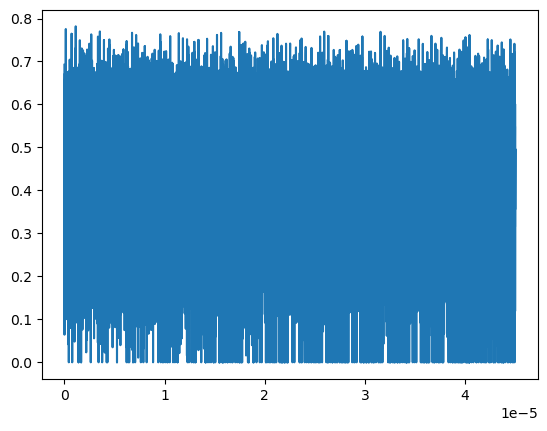

In [89]:
N=20
ec=1.6e-19
h=(6.62e-34)/2*np.pi
c=3e8
#w_a=c/780e-9
w_a=50e9
g=2*(np.pi)*7.8e6
kappa=2*(np.pi)*2.5e6
gamma=2*(np.pi)*3e6
alpha=1.4
#tlist = np.linspace(0, 45e-6, 450)
#tlist=round(tlist,8)
t_p=25e-6

tlist=[]

t=0.0
while t<=45:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-6)
    tlist.append(float("%.8f"%o))
    t=t+0.001
tlist=np.array(tlist)

No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)
fida=result.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)

fig=plt.figure()
ax=fig.add_subplot(111)
line=ax.plot(tlist,fida1)
plt.show()


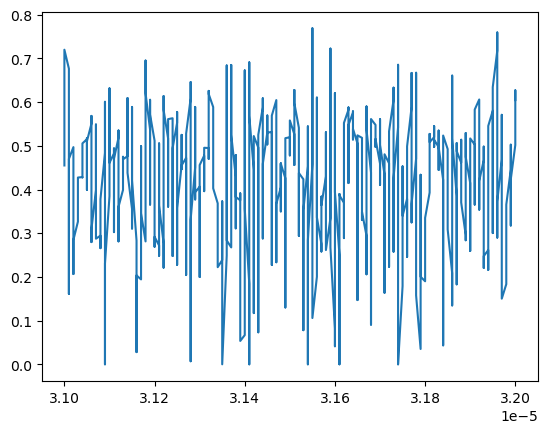

[136, 722, 1130, 1131, 2680, 3349, 3538, 4491, 6751, 7159, 7160, 9567, 10561, 10562, 11419, 11420, 11827, 11828, 12236, 13378, 14236, 15230, 15638, 17448, 17449, 20851, 21259, 23667, 25519, 25927, 25928, 26335, 26336, 29738, 31548, 31549, 31956, 31957, 34217, 35359, 36624, 36625, 37619, 40027, 40435, 42246, 44506]
[[1.36000000e+02 7.75556538e-01]
 [7.22000000e+02 7.64443169e-01]
 [1.13000000e+03 7.81839263e-01]
 [1.13100000e+03 7.56985511e-01]
 [2.68000000e+03 7.63152426e-01]
 [3.34900000e+03 7.57971603e-01]
 [3.53800000e+03 7.69928377e-01]
 [4.49100000e+03 7.51380068e-01]
 [6.75100000e+03 7.66847403e-01]
 [7.15900000e+03 7.61749771e-01]
 [7.16000000e+03 7.53190763e-01]
 [9.56700000e+03 7.63270586e-01]
 [1.05610000e+04 7.55442155e-01]
 [1.05620000e+04 7.59026285e-01]
 [1.14190000e+04 7.66045386e-01]
 [1.14200000e+04 7.59707648e-01]
 [1.18270000e+04 7.54154172e-01]
 [1.18280000e+04 7.53786936e-01]
 [1.22360000e+04 7.51751595e-01]
 [1.33780000e+04 7.50180208e-01]
 [1.42360000e+04 7.52717

In [88]:
f=[]
t=[]
for i in range(31000,32000):
    f.append(fida1[i])
    t.append(tlist[i])

fig=plt.figure()
ax=fig.add_subplot(111)
line=ax.plot(t,f)
plt.show()

fida1=np.array(fida1)
fifa=fida1[fida1>0.75]
I=[]
for i in  range(0,len(fida1)):
    if fida1[i]>0.75:
        I.append(i)
print(I)
I=np.array(I)
fifa=np.array(fifa)

H=[[],[]]
for i in range(0,len(I)):
    H[0].append(I[i])
    H[1].append(fifa[i])
print((np.array(H)).T)


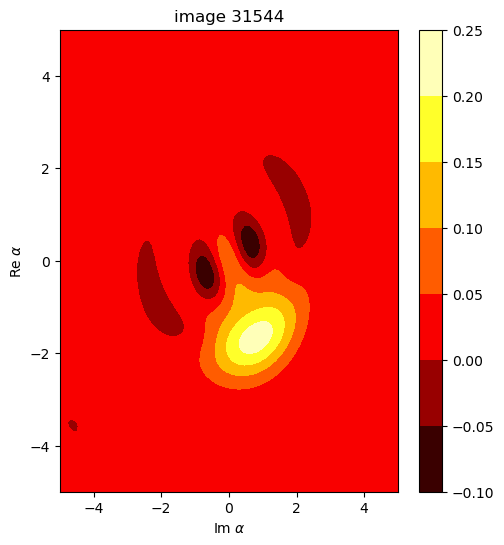

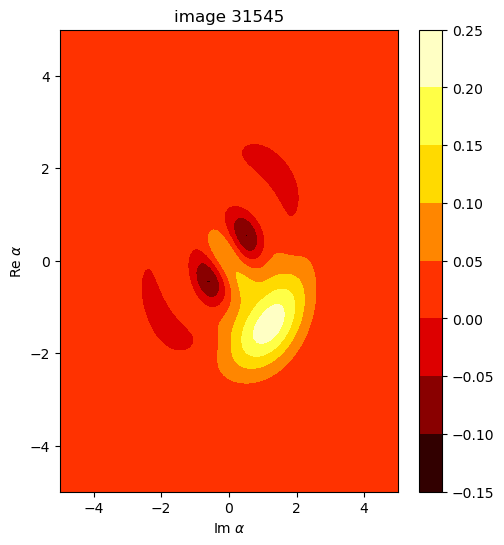

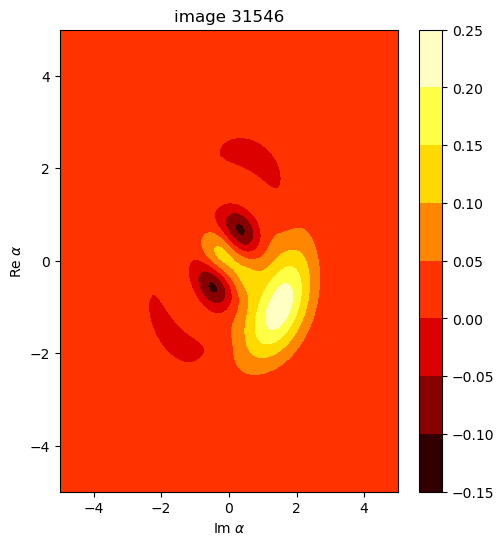

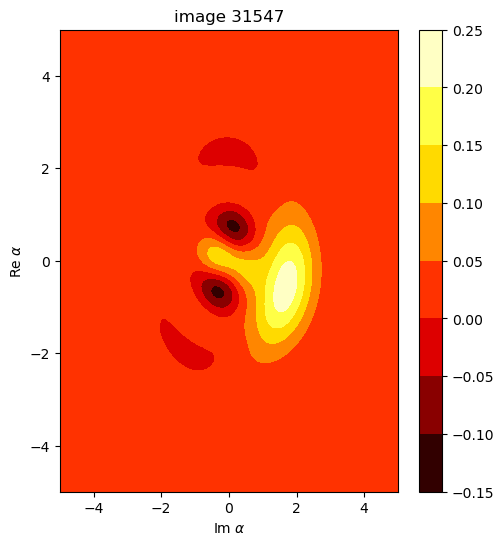

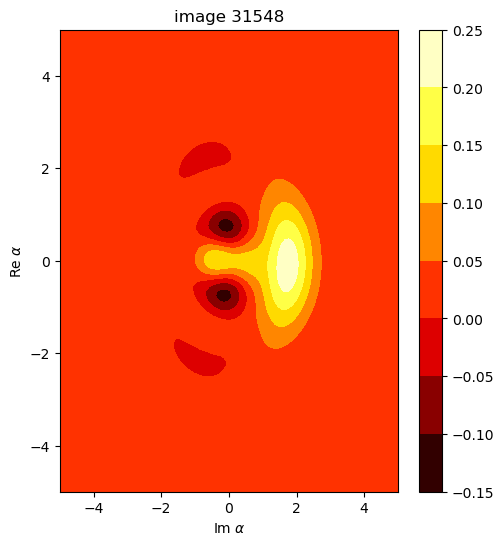

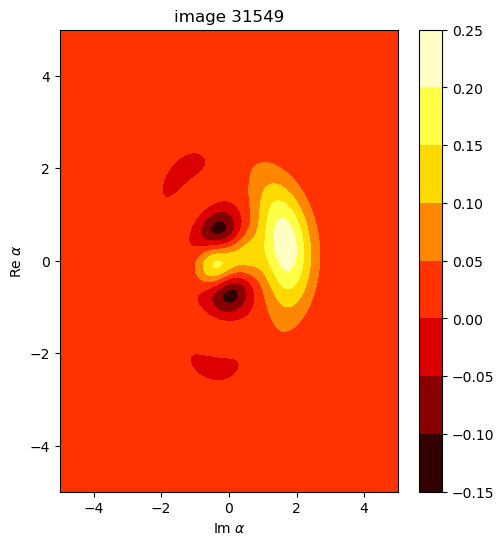

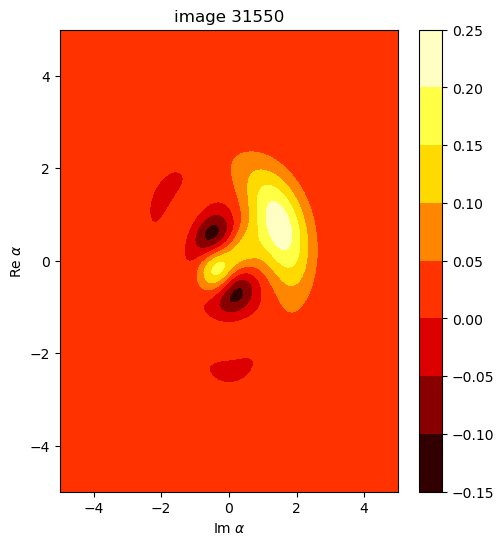

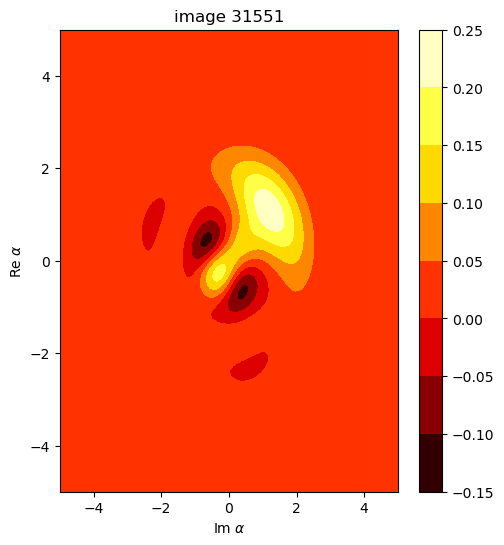

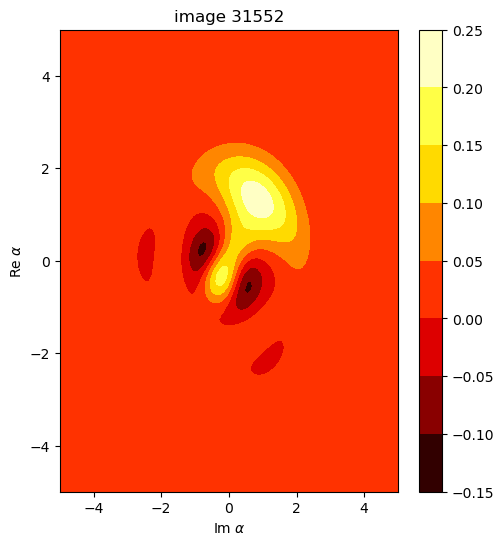

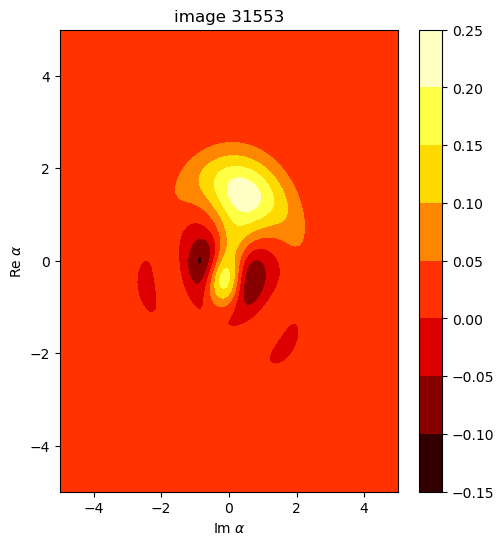

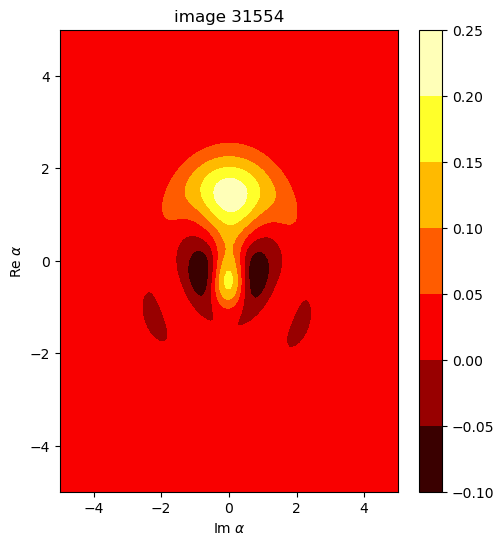

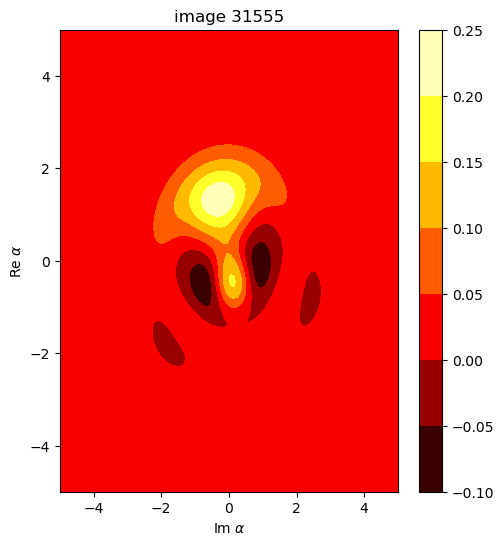

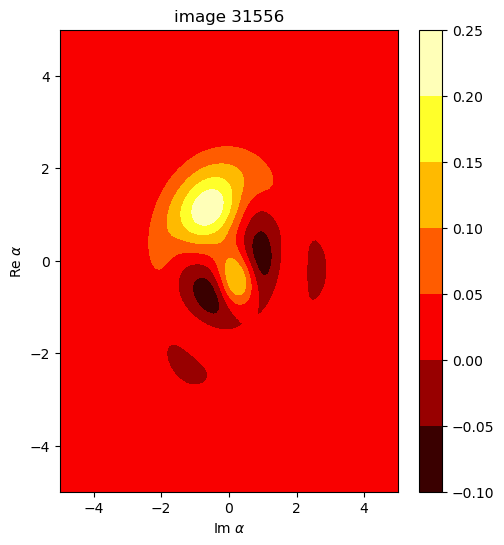

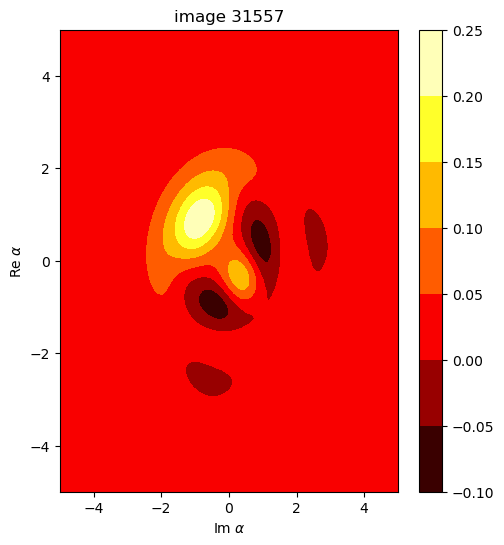

In [87]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6))
    axes1=fig.add_subplot(1,2,1)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number') 
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)

#3.3199
for i in range(31544,31558,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)

#19343,19344